# Аналитика данных с помощью `pandas` и `matplotlib`

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

> **Напоминание**
>
>Минимальные баллы для получения зачёта по этой работе - **1 балл**. Если вы не набираете тут 1 балл, то по всему курсу вы получаете неуд (см. слайды с вводной презентации).

## 1. Данные (2 балла)

Скачиваем данные для работы:

In [1]:
%%bash
gdown 1e-Q_15W7ExExQarKqgjrtoO-LHi9oJs3

Downloading...
From: https://drive.google.com/uc?id=1e-Q_15W7ExExQarKqgjrtoO-LHi9oJs3
To: /content/coins.csv
100%|██████████| 3.98M/3.98M [00:00<00:00, 146MB/s]


Начнем с необходимых приготовлений.

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl  
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е
import plotly.graph_objects as go
%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла *"coins.csv"*. Создайте объект типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберите колонку с датой.

In [3]:
coins = pd.read_csv('coins.csv')
coins.index = coins['date']
coins.index.name = 'index'

Посмотрим что получилось

In [4]:
coins.head(4)

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
index,,,,,,,,,,,,,
2013-04-28,2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [5]:
symbols = dict(coins['symbol'].value_counts()) #66 различных монет
names = dict(coins['name'].value_counts()) #70 монет
for count_symb in symbols.values():
  for name, count_name in names.items():
    if count_symb == count_name :
      del names[name]
      break
names
#symbols['BTG']

{'Iconomi': 615,
 'Bitmark': 329,
 'iCoin': 315,
 'Bytom': 303,
 'Kyber Network': 256,
 'KingN Coin': 255,
 'Bitcoin Gold': 206,
 'Bitgem': 206}

в таблице есть коллизии между именами и их тикерами на бирже, так, например BitCoin Gold и BitGem имеют тикер BTG, поэтому корректнее считать по колонке 'name'

### 2. За какой период данные мы имеем? (0.4 балла)

In [6]:
coins = coins.sort_values(by = 'date') #cортировка в лексиграфическом порядке будет правильно сортировать по датам

print(coins['date'][coins.shape[0]-1], #период = 5 лет 2 месяца 22 дня
coins['date'][0], sep = '\n')


2018-06-06
2013-04-28


### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны? (0.5 балла)

In [7]:
coins.isna().sum() #пропуски обусловленные пропусками в данных о сети блокчейна, могут быть вызваны неправильным методом сбора этих данных

date                  0
price               327
txCount            1520
txVolume           1830
activeAddresses    1520
symbol                0
name                  0
open                  0
high                  0
low                   0
close                 0
volume                0
market                0
dtype: int64

### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [8]:
df = coins.sort_values(by = 'price', ascending=False)
df.head(1) #BTC, 2017-12-17

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
index,,,,,,,,,,,,,
2017-12-17,2017-12-17,19475.8,391725.0,3.746920e+10,1176110.0,BTC,Bitcoin,19475.8,20089.0,18974.1,19140.8,1.331460e+10,3.261410e+11


### 5. У какой монеты самая высокая и самая низкая суммарная капитализация? Постройте круговую диаграмму с долями. (0.5 балла)

Bitcoin   57439466431000.0
KingN Coin   10608251.0


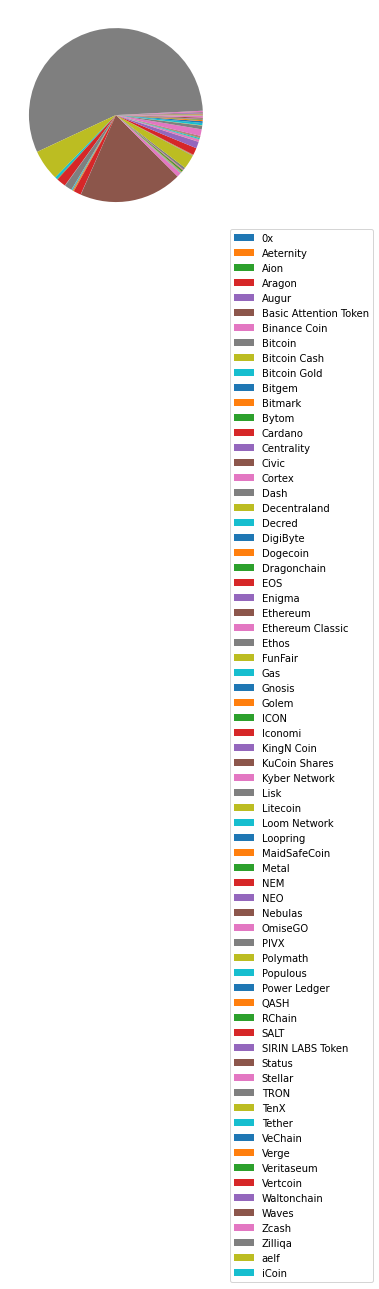

In [10]:
capa = coins.groupby('name').sum()
for i in range(0, len(capa)):
    if capa.market[i] == capa.market.min() or capa.market[i] == capa.market.max():
        print(capa.index[i], ' ', capa.market[i])
plt.pie(capa.market)
plt.legend(capa.index, loc = "upper left", bbox_to_anchor=(1, 0))
plt.show()
# минимальная суммарная капитализация: KingN Coin
# максимальная суммарная капитализация : Bitcoin

## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

**Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.**

На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать `matplotlib.finance.candlestick_ohlc` (`mpl_finance.candlestick_ohlc`), но можно и без него.

In [ ]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
  data = coins[start_date:end_date]
  data = data[data['symbol'] == symbol]
  fig = go.Figure(
      data=go.Ohlc(
          x=data.index,
          open=data["open"],
          high=data["high"],
          low=data["low"],
          close=data["close"]
      )
  )
  fig.show()

Посмотрим, что получилось:

In [ ]:
plot_fancy_price_action(coins=coins, symbol='BTC', start_date='2013-06-01', end_date='2019-06-30') 

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)

Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - **pump'n'dump** (накачка и сброс). 

Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Ваша задача -- **найти самый сильный pump'n'dump** монеты на заданном промежутке времени. Для этого для каждого дня определим число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день, когда `pnd` был максимален и величину `pnd`.

In [ ]:
import math #будем проверять даже если значения нет
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
      data = coins[start_date:end_date]
      data = data[data['symbol'] == symbol]
      data.dropna()
      data['pnd']=data['high']/ (data['close']*(data['close']>data['open']) + data['open']* (data['open'] > data['close']))
      data = data[data['pnd'] != math.inf]
      return(data.pnd[data['pnd'].idxmax()],data['pnd'].idxmax())

In [ ]:
find_most_severe_pump_and_dump(coins, symbol='ZRX', start_date='2017-06-01', end_date='2018-06-01')

(1.254990051045648, '2018-04-05')

Сравните эти значения для разных монет:

In [ ]:
start_date = '2014-05-14'
end_date = '2018-05-14'
for symbol in set(coins['symbol']):
  print(symbol, find_most_severe_pump_and_dump(coins, symbol = symbol,
                                       start_date = start_date, end_date = end_date
                                       ))

PIVX (4.384740637357525, '2016-08-18')
ADA (1.2906403940886697, '2017-10-01')
ETC (1.278985507246377, '2016-08-02')
BAT (1.2342492522991364, '2017-06-04')
WAVES (1.5567891434293681, '2016-06-05')
GAS (1.477106227106227, '2017-09-14')
GNO (1.653659748974773, '2018-03-25')
PAY (1.3514021619927934, '2017-07-06')
VERI (33.549253731343285, '2017-06-11')
ETHOS (1.3698404867620457, '2017-08-05')
XLM (1.7708575412502903, '2014-08-10')
LSK (2.35472972972973, '2016-05-24')
DRGN (1.211764705882353, '2018-01-02')
ZRX (1.254990051045648, '2018-04-05')
ELF (1.2808988764044942, '2018-01-05')
CTXC (1.1428571428571428, '2018-04-24')
REP (1.477601285025879, '2018-05-11')
ETH (1.2508833922261484, '2015-08-07')
SNT (1.3861630321910696, '2017-11-29')
POLY (1.4553773349994372, '2018-02-02')
SRN (1.8916487255607852, '2017-12-30')
MANA (2.9702777900454884, '2017-09-21')
DCR (1.8054444587795122, '2018-04-25')
TRX (9.651010376843255, '2017-09-16')
ENG (1.3618677042801557, '2017-12-25')
BTG (date
2018-02-21    1

<ipython-input-14-5179dca6da9e>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



DASH (4.7824267782426775, '2015-09-17')
RHOC (5.075208458226606, '2017-10-08')
LTC (1.4549071618037137, '2014-08-04')
XVG (2.539906103286385, '2016-04-11')
LRC (4.528409090909091, '2017-09-23')
POWR (1.3641688298886077, '2017-11-02')


## 4. Окупаемость инвестиций (1 балл)

Вам нужно посчитать **окупаемость инвестиций (ROI)** в криптовалюты на заданном промежутке времени. 

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

`investments` - словарь, в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD).

In [ ]:
def compute_roi(coins, investments, start_date, end_date):
  balance = dict()

  data = coins[start_date:start_date]
  price_0 = 0
  price_1 = 0 
  for symbol, amount in investments.items():
    price_0 += amount
    balance[symbol] = amount / float(data[data['symbol']== symbol].price)
  data = coins[end_date:end_date]

  for coin, amount in balance.items():
    price_1 += float(data[data['symbol'] == coin].price) * amount
  return (price_1 - price_0)/price_0

In [ ]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

-0.035569133065275614

In [ ]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

51.28330296529592

## 5. Технический анализ (1 балл)

**Технический анализ** - это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - **[границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Кто-то верит, что график касаясь границы от него должен отражаться.

Границы считаются очень просто: 

$$(MA \pm K\sigma),$$

где `MA` - скользящее среднее за `N` дней, а $\sigma$ - скользящее стандартное отклонение за `N` дней.

Нарисуйте **график цены**, **скользящее среднее** и **границы Боллинджера** c параметрами `N (window) = 21`, `K (width) = 2`.

Тут вам поможет функция `rolling` для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [ ]:
def plot_bollinger_bands(coins, symbol, window= 21, width = 2,
                         start_date = '2014-05-14', end_date = '2018-05-14'):
    fig = plt.figure(figsize = (12,6))
    ax = fig.add_subplot(111)
    data = coins[coins['symbol'] == symbol]
    data = data[start_date:end_date]
    data['MA'] = data['price'].rolling(window).mean()
    data['STD'] = data['price'].rolling(window).std()
    data['UP_Bound'] = data['MA'] + (width*data['STD'])
    data['LOW_Bound'] = data['MA'] - (width*data['STD'])

    ax.plot( data['price'], color = 'blue', lw = 2, label = 'close price')
    ax.fill_between(data.index, data['UP_Bound'], data['LOW_Bound'], color='grey', label= 'Bollinger bounds')
    ax.plot(data['MA'], color = 'pink', lw = 0.5, label = 'mean price')
    ax.set_ylabel('PRICE(USD)')
    ax.legend()
    plt.show()

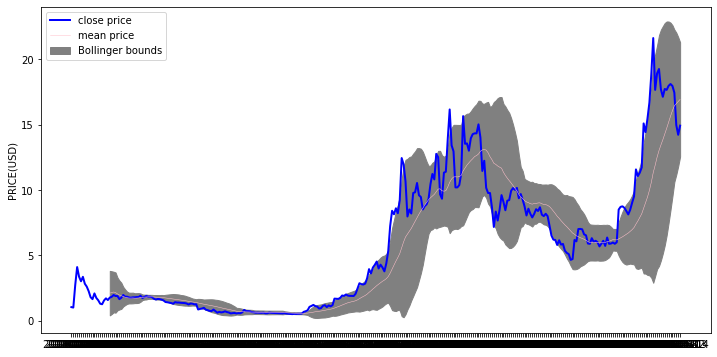

In [ ]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

**Сделайте вывод о том, выполнялось ли правило Боллинджера:**

Правило боллинджера - всего лишь одна из попыток оправдать какую-то случайную величину правилом, которое в общем случае не выполняется

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на [капитализацию](https://academy.binance.com/ru/articles/crypto-market-capitalization-explained). Давайте поймём почему.

**Нарисуйте еще два графика:**
1. общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)
2. доли капитализаций этих монет от общей капитализации рынка. 

При этом используйте данные начиная с 2017-07-01.

In [ ]:
def plot_coins_capitalizations(coins, symbols, start_date):
  coins = coins[start_date::]
  fig = plt.figure(figsize = (12,6))
  ax = fig.add_subplot(111)
  for symbol in symbols: 
    data = coins[coins['symbol'] == symbol]
    ax.plot(data['market'], label = symbol)
  plt.legend()
  plt.show()

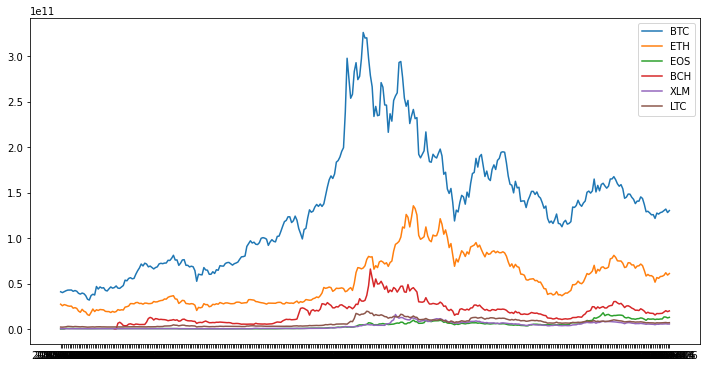

In [ ]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

In [ ]:
cap = dict()
for idx, row in coins.iterrows():
  try: 
    cap[idx]+=row['market']
  except:
    cap[idx]=row['market']
capitalization = pd.DataFrame( pd.Series(cap), columns = ['cap'])


In [ ]:
def plot_relativity_cap(coins, symbols, start_date):
  coins = coins[start_date::]
  cap = capitalization[start_date::]
  fig = plt.figure(figsize = (12,6))
  ax = fig.add_subplot(111)
  for symbol in symbols: 
    data = coins[coins['symbol'] == symbol]
    data['rel'] =  data['market'] / cap['cap']
    ax.plot(data['market'], label = symbol)
  plt.legend()
  plt.show()

<ipython-input-25-89809b66df7e>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



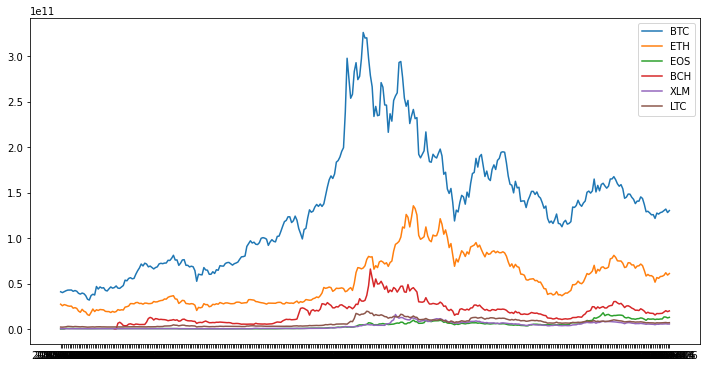

In [ ]:
plot_relativity_cap(coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Проанализируйте зависимость доли капитализации альткойнов (остальных монет, кроме биткойна) от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

**Ваш ответ тут**

## 7. Корреляции монет (1 балл)

Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние `window` дней cо дня `date` с коэффициентом сглаживания `alpha` для набора монет `symbols`.

Реализуйте функцию, которая будет возвращать квадратный `DataFrame` с числом строк и столбцов, равным числу рассматриваемых монет и со значениями корреляций:

In [ ]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result
def calc_coins_correlations(coins, date, symbols, window, alpha):
    date_zero = '2013-05-14'
    coins1 = coins[date_zero:date]
    data = dict()
    for symbol in symbols:
      data_i = coins1[coins1['symbol'] == symbol]
      data_j = data_i['market'].rolling(window).mean()
      data[symbol] = (exponential_smoothing(data_j, alpha))
    df = pd.DataFrame(data)

    df

In [ ]:
def f(series, alpha): #функция, которая делает сглаживания временных данных 
    result = [series[0]] 
    for n in range(1, len(series)):
        
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result
def calc_coins_correlations(coins, date, symbols, window, alpha):
  date_zero = '2013-05-14'
  cap = capitalization[date_zero:date]
  
  cap = capitalization[date_zero:date]
  coins1 = coins[date_zero:date]
  data = dict()
  for symbol in symbols:
    data_i = coins1[coins1['symbol'] == symbol].market / cap['cap']
    data_j = data_i.rolling(window).mean()
    data[symbol] = pd.Series(f(data_j.dropna(), 0.01))
  df = pd.DataFrame(data)
  return df.corr()

In [ ]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-45-5cb301b2dfa8>:5: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,-0.27,-0.84,0.14,-0.63,0.37,0.31
ETH,-0.27,1.00,0.97,0.20,-0.29,-0.68,0.17
EOS,-0.84,0.97,1.00,0.27,0.81,0.77,0.26
BCH,0.14,0.20,0.27,1.00,0.76,-0.20,0.92
XLM,-0.63,-0.29,0.81,0.76,1.00,-0.41,0.84
LTC,0.37,-0.68,0.77,-0.20,-0.41,1.00,-0.32
ADA,0.31,0.17,0.26,0.92,0.84,-0.32,1.00


Довольно интересно ещё взглянуть на 2017-12-27:

In [ ]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=[ 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-46-c19761bfef5f>:5: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,ETH,EOS,BCH,XLM,LTC,ADA
ETH,1.00,0.95,-0.72,-0.16,-0.67,-0.88
EOS,0.95,1.00,-0.73,-0.63,-0.37,-0.89
BCH,-0.72,-0.73,1.00,0.88,0.30,0.29
XLM,-0.16,-0.63,0.88,1.00,0.24,0.73
LTC,-0.67,-0.37,0.30,0.24,1.00,0.83
ADA,-0.88,-0.89,0.29,0.73,0.83,1.00


## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия, основанная на скользящих средних.

Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). **Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае.**

Посмотрим на пример:

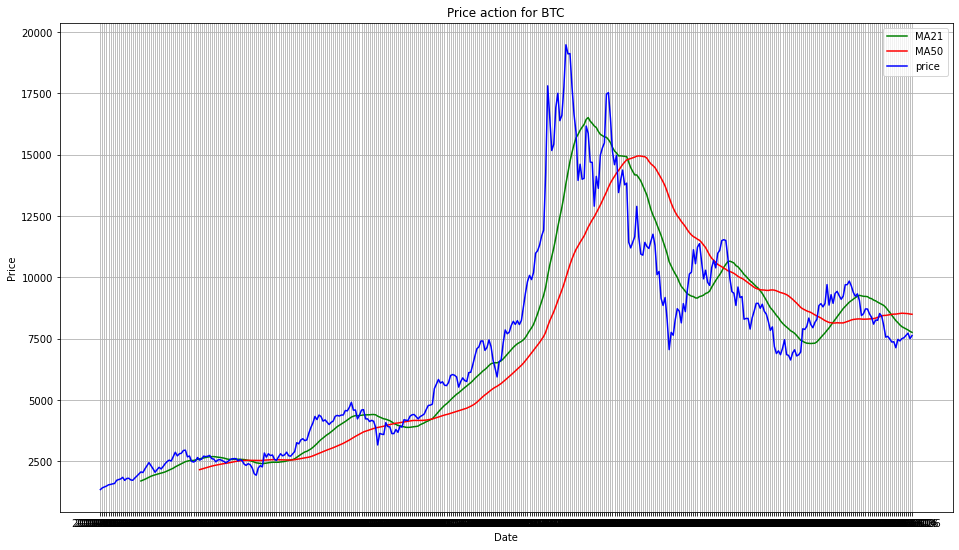

In [ ]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    
    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show() 

plot_moving_averages(
    coins=coins, 
    symbol='BTC', 
    leading_window=21, 
    lagging_window=50, 
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия.


**Реализуйте функцию**, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании (купили и держим, смотрим как растет цена наших купленных валют).

>**Примечания:**
>- Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод `shift(1)` у `Series`.
>- Отношение цен закрытия за сегодня и за вчера - это **multiplier** за сегодняшний день. При этом давайте строить графики накопления для multiplier-ов. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй - 0.5 и в третий - 2, то график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).
>- При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый `threshold` (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [ ]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    # Paste your code here

In [ ]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21, 
    min=1, 
    max=200, 
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1, 
    max=200, 
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0, 
    max=0.20, 
    step=0.001, 
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели:

**Ваш ответ тут**

## 9. Отказ от ответственности 

Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.